In [39]:
import seaborn as sns  #用于画图
from bs4 import BeautifulSoup  #用于爬取arxiv的数据
import re  #用于正则表达式，匹配字符串的模式
import requests  #用于网络连接，发送网络请求，使用域名获取对应信息
import json  #读取数据，我们的数据为json格式的
import pandas as pd  #数据处理，数据分析
import matplotlib.pyplot as plt  #画图工具
import openpyxl

In [2]:
# 读入数据
data  = []

#使用with语句优势：1.自动关闭文件句柄；2.自动显示（处理）文件读取数据异常
with open("arxiv-metadata-oai-snapshot.json", 'r') as f: 
    for idx, line in enumerate(f): 
        
        # 读取前100行，如果读取所有数据需要8G内存
        if idx >= 100:
            break
        
        data.append(json.loads(line))
        
data = pd.DataFrame(data) #将list变为dataframe格式，方便使用pandas进行分析
data.shape #显示数据大小

(100, 14)

In [3]:
data.head()

,id,submitter,authors,title,comments,journal-ref,doi,report-no,categories,license,abstract,versions,update_date,authors_parsed
0,0704.0001,Pavel Nadolsky,"C. Bal\'azs, E. L. Berger, P. M. Nadolsky, C.-...",Calculation of prompt diphoton production cros...,"37 pages, 15 figures; published version","Phys.Rev.D76:013009,2007",10.1103/PhysRevD.76.013009,ANL-HEP-PR-07-12,hep-ph,None,A fully differential calculation in perturba...,"[{'version': 'v1', 'created': 'Mon, 2 Apr 2007...",2008-11-26,"[[Balázs, C., ], [Berger, E. L., ], [Nadolsky,..."
1,0704.0002,Louis Theran,Ileana Streinu and Louis Theran,Sparsity-certifying Graph Decompositions,To appear in Graphs and Combinatorics,None,None,None,math.CO cs.CG,http://arxiv.org/licenses/nonexclusive-distrib...,"We describe a new algorithm, the $(k,\ell)$-...","[{'version': 'v1', 'created': 'Sat, 31 Mar 200...",2008-12-13,"[[Streinu, Ileana, ], [Theran, Louis, ]]"
2,0704.0003,Hongjun Pan,Hongjun Pan,The evolution of the Earth-Moon system based o...,"23 pages, 3 figures",None,None,None,physics.gen-ph,None,The evolution of Earth-Moon system is descri...,"[{'version': 'v1', 'created': 'Sun, 1 Apr 2007...",2008-01-13,"[[Pan, Hongjun, ]]"
3,0704.0004,David Callan,David Callan,A determinant of Stirling cycle numbers counts...,11 pages,None,None,None,math.CO,None,We show that a determinant of Stirling cycle...,"[{'version': 'v1', 'created': 'Sat, 31 Mar 200...",2007-05-23,"[[Callan, David, ]]"
4,0704.0005,Alberto Torchinsky,Wael Abu-Shammala and Alberto Torchinsky,From dyadic $\Lambda_{\alpha}$ to $\Lambda_{\a...,None,"Illinois J. Math. 52 (2008) no.2, 681-689",None,None,math.CA math.FA,None,In this paper we show how to compute the $\L...,"[{'version': 'v1', 'created': 'Mon, 2 Apr 2007...",2013-10-15,"[[Abu-Shammala, Wael, ], [Torchinsky, Alberto, ]]"


In [90]:
def readArxivFile(path, columns=['id', 'submitter', 'authors', 'title', 'comments', 'journal-ref', 'doi',
       'report-no', 'categories', 'license', 'abstract', 'versions',
       'update_date', 'authors_parsed'], count=None):
    
    data  = []
    with open(path, 'r') as f: 
        for idx, line in enumerate(f): 
            if idx == count:
                break
                
            d = json.loads(line)
            d = {col : d[col] for col in columns}
            data.append(d)

    data = pd.DataFrame(data)
    return data

data = readArxivFile('arxiv-metadata-oai-snapshot.json', ['id', 'categories', 'update_date'])

In [5]:
data['categories'].describe()

count      1796911
unique       62055
top       astro-ph
freq         86914
Name: categories, dtype: object

In [6]:
data.shape #显示数据大小

(1796911, 3)

In [7]:
unique_categories = set([i for l in [x.split(' ') for x in data['categories']] for i in l])

In [8]:
unique_categories

{'acc-phys',
 'adap-org',
 'alg-geom',
 'ao-sci',
 'astro-ph',
 'astro-ph.CO',
 'astro-ph.EP',
 'astro-ph.GA',
 'astro-ph.HE',
 'astro-ph.IM',
 'astro-ph.SR',
 'atom-ph',
 'bayes-an',
 'chao-dyn',
 'chem-ph',
 'cmp-lg',
 'comp-gas',
 'cond-mat',
 'cond-mat.dis-nn',
 'cond-mat.mes-hall',
 'cond-mat.mtrl-sci',
 'cond-mat.other',
 'cond-mat.quant-gas',
 'cond-mat.soft',
 'cond-mat.stat-mech',
 'cond-mat.str-el',
 'cond-mat.supr-con',
 'cs.AI',
 'cs.AR',
 'cs.CC',
 'cs.CE',
 'cs.CG',
 'cs.CL',
 'cs.CR',
 'cs.CV',
 'cs.CY',
 'cs.DB',
 'cs.DC',
 'cs.DL',
 'cs.DM',
 'cs.DS',
 'cs.ET',
 'cs.FL',
 'cs.GL',
 'cs.GR',
 'cs.GT',
 'cs.HC',
 'cs.IR',
 'cs.IT',
 'cs.LG',
 'cs.LO',
 'cs.MA',
 'cs.MM',
 'cs.MS',
 'cs.NA',
 'cs.NE',
 'cs.NI',
 'cs.OH',
 'cs.OS',
 'cs.PF',
 'cs.PL',
 'cs.RO',
 'cs.SC',
 'cs.SD',
 'cs.SE',
 'cs.SI',
 'cs.SY',
 'dg-ga',
 'econ.EM',
 'econ.GN',
 'econ.TH',
 'eess.AS',
 'eess.IV',
 'eess.SP',
 'eess.SY',
 'funct-an',
 'gr-qc',
 'hep-ex',
 'hep-lat',
 'hep-ph',
 'hep-th',
 'm

In [9]:
len(unique_categories)

176

In [91]:
data['year'] = pd.to_datetime(data['update_date']).dt.year # 将update_date的日期转换格式并提取年份
del data['update_date']
# 之前学的是data.drop('update_date',axis=1,inplace=True)

In [92]:
data = data[data.year >= 2019].reset_index(drop=True)

In [63]:
data

,id,categories,year
0,0704.0297,astro-ph,2019
1,0704.0342,math.AT,2019
2,0704.0360,astro-ph,2019
3,0704.0525,gr-qc,2019
4,0704.0535,astro-ph,2019
...,...,...,...
395118,quant-ph/9911051,quant-ph,2020
395119,solv-int/9511005,solv-int nlin.SI,2019
395120,solv-int/9809008,solv-int nlin.SI,2019
395121,solv-int/9909010,solv-int adap-org hep-th nlin.AO nlin.SI,2019


In [13]:
# 爬取所有的类别
website_url = requests.get('https://arxiv.org/category_taxonomy').text #获取网页的文本数据
soup = BeautifulSoup(website_url,'lxml') #爬取数据，这里使用lxml的解析器，加速
root = soup.find('div',{'id':'category_taxonomy_list'}) #找出 BeautifulSoup 对应的标签入口
tags = root.find_all(["h2","h3","h4","p"], recursive=True) #读取 tags

#初始化 str 和 list 变量
level_1_name = ""
level_2_name = ""
level_2_code = ""
level_1_names = []
level_2_codes = []
level_2_names = []
level_3_codes = []
level_3_names = []
level_3_notes = []

#进行
for t in tags:
    if t.name == "h2":
        level_1_name = t.text    
        level_2_code = t.text
        level_2_name = t.text
    elif t.name == "h3":
        raw = t.text
        level_2_code = re.sub(r"(.*)\((.*)\)",r"\2",raw) #正则表达式：模式字符串：(.*)\((.*)\)；被替换字符串"\2"；被处理字符串：raw
        level_2_name = re.sub(r"(.*)\((.*)\)",r"\1",raw)
    elif t.name == "h4":
        raw = t.text
        level_3_code = re.sub(r"(.*) \((.*)\)",r"\1",raw)
        level_3_name = re.sub(r"(.*) \((.*)\)",r"\2",raw)
    elif t.name == "p":
        notes = t.text
        level_1_names.append(level_1_name)
        level_2_names.append(level_2_name)
        level_2_codes.append(level_2_code)
        level_3_names.append(level_3_name)
        level_3_codes.append(level_3_code)
        level_3_notes.append(notes)

#根据以上信息生成dataframe格式的数据
df_taxonomy = pd.DataFrame({
    'group_name' : level_1_names,
    'archive_name' : level_2_names,
    'archive_id' : level_2_codes,
    'category_name' : level_3_names,
    'categories' : level_3_codes,
    'category_description': level_3_notes
    
})

#按照 "group_name" 进行分组，在组内使用 "archive_name" 进行排序
df_taxonomy.groupby(["group_name","archive_name"])
df_taxonomy

,group_name,archive_name,archive_id,category_name,categories,category_description
0,Computer Science,Computer Science,Computer Science,Artificial Intelligence,cs.AI,"Covers all areas of AI except Vision, Robotics..."
1,Computer Science,Computer Science,Computer Science,Hardware Architecture,cs.AR,Covers systems organization and hardware archi...
2,Computer Science,Computer Science,Computer Science,Computational Complexity,cs.CC,"Covers models of computation, complexity class..."
3,Computer Science,Computer Science,Computer Science,"Computational Engineering, Finance, and Science",cs.CE,Covers applications of computer science to the...
4,Computer Science,Computer Science,Computer Science,Computational Geometry,cs.CG,Roughly includes material in ACM Subject Class...
...,...,...,...,...,...,...
150,Statistics,Statistics,Statistics,Computation,stat.CO,"Algorithms, Simulation, Visualization"
151,Statistics,Statistics,Statistics,Methodology,stat.ME,"Design, Surveys, Model Selection, Multiple Tes..."
152,Statistics,Statistics,Statistics,Machine Learning,stat.ML,"Covers machine learning papers (supervised, un..."
153,Statistics,Statistics,Statistics,Other Statistics,stat.OT,Work in statistics that does not fit into the ...


In [14]:
_df = data.merge(df_taxonomy, on="categories", how="left").drop_duplicates(["id","group_name"]).groupby("group_name").agg({"id":"count"}).sort_values(by="id",ascending=False).reset_index()

_df

,group_name,id
0,Physics,79985
1,Mathematics,51567
2,Computer Science,40067
3,Statistics,4054
4,Electrical Engineering and Systems Science,3297
5,Quantitative Biology,1994
6,Quantitative Finance,826
7,Economics,576


In [31]:
merge_df = data.merge(df_taxonomy, on="categories", how="left")

In [46]:
merge_df.dropna()

,id,categories,year,group_name,archive_name,archive_id,category_name,category_description
1,0704.0342,math.AT,2019,Mathematics,Mathematics,Mathematics,Algebraic Topology,"Homotopy theory, homological algebra, algebrai..."
3,0704.0525,gr-qc,2019,Physics,General Relativity and Quantum Cosmology,gr-qc,General Relativity and Quantum Cosmology,Description coming soon
5,0704.0710,nucl-ex,2019,Physics,Nuclear Experiment,nucl-ex,Nuclear Experiment,Description coming soon
6,0704.0752,hep-th,2020,Physics,High Energy Physics - Theory,hep-th,High Energy Physics - Theory,Description coming soon
7,0704.0803,quant-ph,2019,Physics,Quantum Physics,quant-ph,Quantum Physics,Description coming soon
...,...,...,...,...,...,...,...,...
395113,quant-ph/9807066,quant-ph,2019,Physics,Quantum Physics,quant-ph,Quantum Physics,Description coming soon
395114,quant-ph/9812029,quant-ph,2019,Physics,Quantum Physics,quant-ph,Quantum Physics,Description coming soon
395115,quant-ph/9903065,quant-ph,2019,Physics,Quantum Physics,quant-ph,Quantum Physics,Description coming soon
395116,quant-ph/9904032,quant-ph,2019,Physics,Quantum Physics,quant-ph,Quantum Physics,Description coming soon


In [35]:
merge_df[merge_df.group_name.isnull()]

,id,categories,year,group_name,archive_name,archive_id,category_name,category_description
0,0704.0297,astro-ph,2019,NaN,NaN,NaN,NaN,NaN
2,0704.0360,astro-ph,2019,NaN,NaN,NaN,NaN,NaN
4,0704.0535,astro-ph,2019,NaN,NaN,NaN,NaN,NaN
11,0704.1245,astro-ph,2019,NaN,NaN,NaN,NaN,NaN
13,0704.1403,math.QA math.DG math.SG,2020,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
395117,quant-ph/9910035,quant-ph cond-mat math-ph math.MP,2020,NaN,NaN,NaN,NaN,NaN
395119,solv-int/9511005,solv-int nlin.SI,2019,NaN,NaN,NaN,NaN,NaN
395120,solv-int/9809008,solv-int nlin.SI,2019,NaN,NaN,NaN,NaN,NaN
395121,solv-int/9909010,solv-int adap-org hep-th nlin.AO nlin.SI,2019,NaN,NaN,NaN,NaN,NaN


In [45]:
outputpath='cats.xlsx'
df_taxonomy.to_excel(outputpath,index=False,header=False)

In [64]:
data = data['categories'].str.split(' ',expand=True).stack().reset_index(level=0).set_index('level_0').rename(columns={0:'categories'}).join(data.drop('categories',axis=1))

In [65]:
merge_ = data.merge(df_taxonomy, on="categories", how="left")

,categories,id,year
0,astro-ph,0704.0297,2019
1,math.AT,0704.0342,2019
2,astro-ph,0704.0360,2019
3,gr-qc,0704.0525,2019
4,astro-ph,0704.0535,2019
...,...,...,...
395121,hep-th,solv-int/9909010,2019
395121,nlin.AO,solv-int/9909010,2019
395121,nlin.SI,solv-int/9909010,2019
395122,solv-int,solv-int/9909014,2019


In [75]:
merge_.loc[merge_['categories']=='acc-phys','group_name'] = 'Physics'
merge_.loc[merge_['categories']=='adap-org','group_name'] = 'Physics'
merge_.loc[merge_['categories']=='alg-geom','group_name'] = 'Mathematics'
merge_.loc[merge_['categories']=='astro-ph','group_name'] = 'Physics'
merge_.loc[merge_['categories']=='chao-dyn','group_name'] = 'Physics'
merge_.loc[merge_['categories']=='chem-ph','group_name'] = 'Physics'
merge_.loc[merge_['categories']=='cmp-lg','group_name'] = 'Computer Science'
merge_.loc[merge_['categories']=='comp-gas','group_name'] = 'Physics'
merge_.loc[merge_['categories']=='dg-ga','group_name'] = 'Mathematics'
merge_.loc[merge_['categories']=='funct-an','group_name'] = 'Mathematics'
merge_.loc[merge_['categories']=='patt-sol','group_name'] = 'Physics'
merge_.loc[merge_['categories']=='plasm-ph','group_name'] = 'Physics'
merge_.loc[merge_['categories']=='q-alg','group_name'] = 'Mathematics'
merge_.loc[merge_['categories']=='solv-int','group_name'] = 'Physics'

In [82]:
merge_=merge_.drop_duplicates(["id","group_name","categories"]).groupby("group_name").agg({"id":"count"}).sort_values(by="id",ascending=False).reset_index()

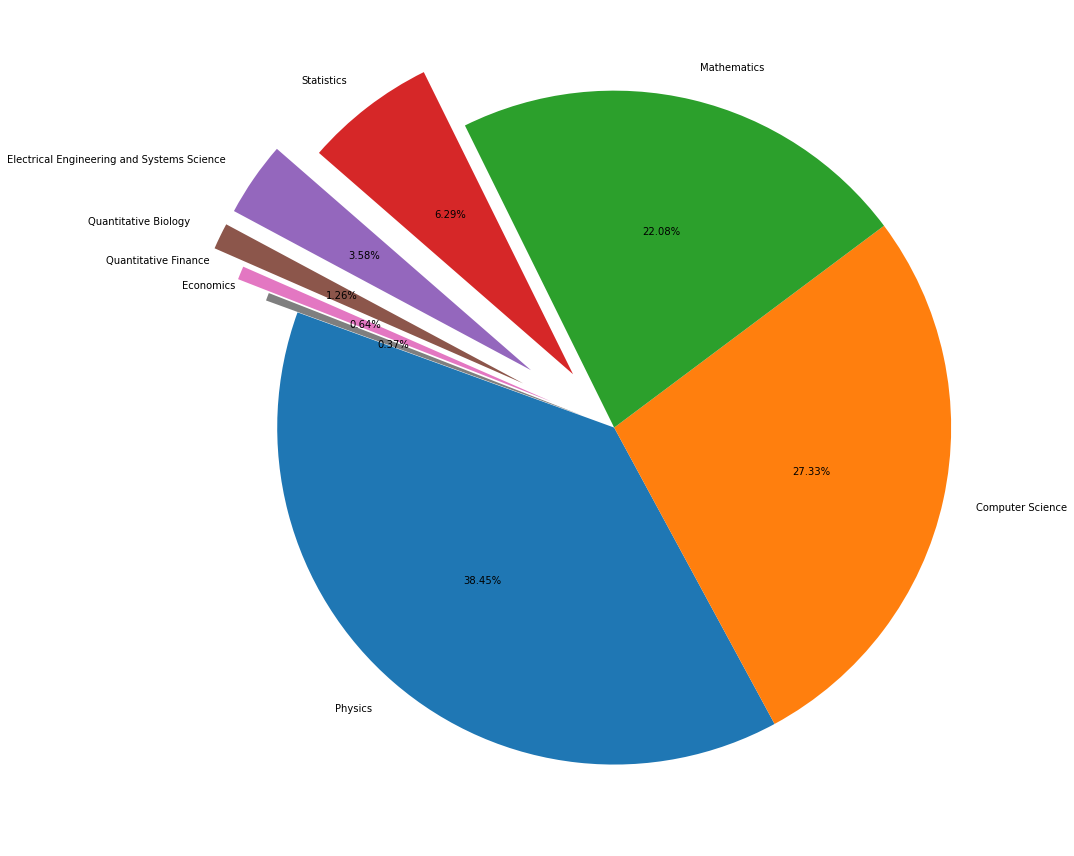

In [85]:
fig = plt.figure(figsize=(15,12))
explode = (0, 0, 0, 0.2, 0.3, 0.3, 0.2, 0.1) 
plt.pie(merge_["id"],  labels=merge_["group_name"], autopct='%1.2f%%', startangle=160, explode=explode)
plt.tight_layout()
plt.show()

In [93]:
cats = data.merge(df_taxonomy, on="categories")
cats.loc[cats['categories']=='cmp-lg','group_name'] = 'Computer Science'

In [94]:
cats = cats.query("group_name == 'Computer Science'")

In [95]:
cats.groupby(["year","category_name"]).count().reset_index().pivot(index="category_name", columns="year",values="id")

year,2019,2020
category_name,,
Artificial Intelligence,558,757
Computation and Language,2153,2906
Computational Complexity,131,188
"Computational Engineering, Finance, and Science",108,205
Computational Geometry,199,216
Computer Science and Game Theory,281,323
Computer Vision and Pattern Recognition,5559,6517
Computers and Society,346,564
Cryptography and Security,1067,1238
